In [1]:
# Alle Variablen löschen ohne zu fragen.
# Hierdurch werden Seiteneffekte vermieden.
%reset -f

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from   mpl_toolkits import mplot3d

%matplotlib notebook

In [5]:
# Definition einer Funktion z(x,y) = 10*sin(sqrt(x**2+y**2))+2x
# = Funktionsgebirge über x-y-Ebene

# Hier geht es los .........
def MyFunction(x, y):
    z = 10*np.sin(np.sqrt(x**2+y**2))+2*x
    return z

In [6]:
# Definition des Gradienten grad(z(x,y)) = [dz/dx, dz/dy] 
# von MyFunftion

# Hier geht es los .........
def MyGradient(x, y):
    dx = ((10*x*np.cos(np.sqrt(x**2 + y**2)))/np.sqrt(y**2+x**2)) + 2
    dy = (10*y*np.cos(np.sqrt(y**2 + x**2)))/np.sqrt(y**2+x**2)
    return np.array([dx, dy])


In [7]:
# Erzeugen der x- und y-Werte eines zweidimensionalen
# Gitters von -6 bis +6 mit 100 Schritten unterteilt
# --> XGrid, YGrid
# Hinweis: (linspace, meshgrid)  
  
# Hier geht es los .........
xgrid = np.linspace(-6, 6, 100)
ygrid = np.linspace(-6, 6, 100)
XGrid, YGrid = np.meshgrid(xgrid, ygrid)

#print('xgrid.shape =', xgrid.shape)
#print('XGrid.shape =', XGrid.shape)

#print()
#print('XGrid =',XGrid)
#print()
#print('YGrid =',YGrid)

In [8]:
# Berechnung der Funktionswerte z für alle 
# Werte XGrid, YGrid

# Hier geht es los .........
Z = MyFunction(XGrid, YGrid)
#print('Z=', Z)


<IPython.core.display.Javascript object>


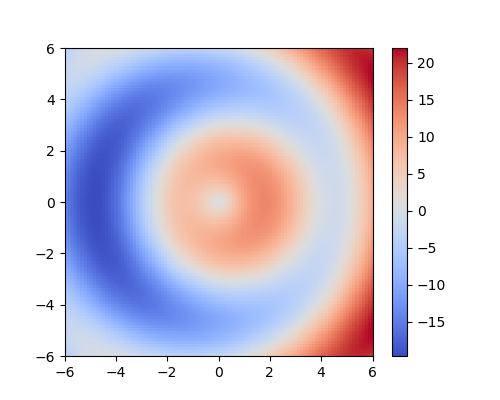

In [9]:
# Anzeige der Funktion (je höher der Funktionswert, desto roter ....)

# Hier geht es los .........
fig = plt.figure(1, figsize=(5, 4))
#fig = plt.figure(1)
plt.imshow(Z, origin='lower', extent=[-6,6,-6,6 ], cmap='coolwarm')
cb = plt.colorbar()

<IPython.core.display.Javascript object>


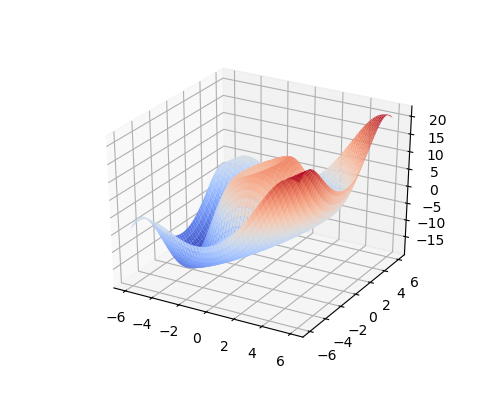

In [11]:
# Anzeige der Funktion z(x,y) als Surfaceplot

# Hier geht es los .........
fig = plt.figure(3, figsize=(5, 4))
ax  = plt.axes(projection='3d')
ax.plot_surface(XGrid, YGrid, Z, cmap='coolwarm')

In [12]:
# Suche eines lokalen Minimums durch Gradientenabstieg
n     = 40     # Anzahl der Schritte
eta   = 0.25   # Schrittweitenfaktor
alpha = 0.3    # Momentumfaktor

# Koordinaten des Gradientenabstiegs-Pfades 
xVek      = np.zeros((n,2))

# Startpunkt der Iteration
xVek[0]   = np.array([[1.8,0.5]])

# Hier geht es los .........
i = 0
while i < n - 1:
    xVek[i + 1] = xVek[i] -  eta * MyGradient(xVek[i][0], xVek[i][1]) 
    xVek[i + 1] = xVek[i + 1] +  (alpha * (xVek[i] - xVek[i-1]))
    i = i + 1
#print (xVek)

<IPython.core.display.Javascript object>


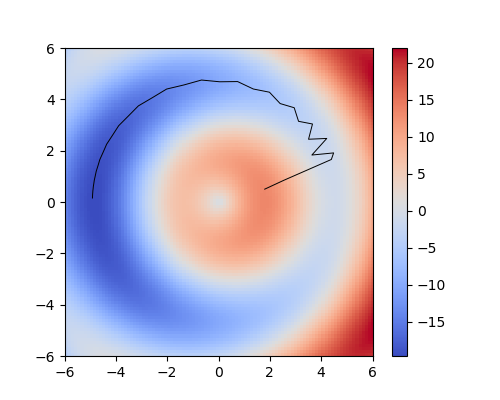

In [13]:
# Funktion (imshow) mit Pfad des Gradientenabstiegs

# Hier geht es los .........
# Anzeige der Funktion (je höher der Funktionswert, desto roter ....)
fig = plt.figure(2, figsize=(5, 4))
#fig = plt.figure(1)
plt.imshow(Z, origin='lower', extent=[-6,6,-6,6 ], cmap='coolwarm')
cb = plt.colorbar()

# Anzeigen des Pfades
plt.plot(xVek[:,0], xVek[:,1], lw=0.7, c='black')

# Beispiel eines Gradientenabstiegs

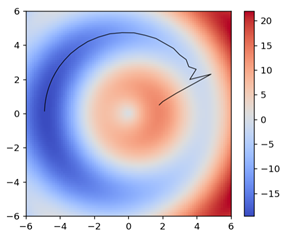